# Clasificador Xgboost CLiengo

En esta notebook se desarrolla un modelo de clasificador (utilizando la librería **XGBoost**) cuyo objetivo es predecir si una *review* es **buena** o **mala**

## Lectura de datos

Teniendo en cuenta lo realizado en notebook **EDA**, donde se realizó un análisis exploratorio de los datos, se tomará la versión del dataset preprocesado en dicha notebook.Básicamente, allí se realizarón las siguientes tareas de limpieza de texto:

* Conversión del  texto a minúscula
* Eliminación de **stopwords**
* Eliminación de los signos de puntuación
* Eliminación de **stopwords del dominio**
* Lematización de los términos

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_dataset = pd.read_csv('training_data_preprocessed.csv')
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words,reviews_avg_length,review cleaned stopwords,lemmatized
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649,4.873652,era necesario mucho coraje para abordar aconte...,necesario coraje abordar acontecimiento recien...
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405,4.577778,esperaba con curiosidad y ciertas ganas el est...,esperar curiosidad y gana estreno antonio band...
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317,4.728707,wes craven convertido en factoría nos vuelve a...,wes cravir convertido factoría volver a contar...
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624,4.766026,va la gente y se rasga las vestiduras con caót...,gente y rasgar vestidura caótico án julio mede...
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395,4.749367,mariano ozoresduración minutosestreno de dic...,mariano ozoresduración minutosestreno dici...


## Generación de *features*

Para la generación de ***features*** se utilizará la matriz de ***Document Term Matrix*** 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = TfidfVectorizer(analyzer='word', ngram_range=(1,2))
data = cv.fit_transform(df_dataset['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_dataset.index
df_dtm.head()

,aa,aa luz,aar,aar eckhart,aar eckhartir,abadés,abadés imaginar,abajo,abajo barriga,abajo casa,...,útil,útil absurdo,útil exposición,útil humanidad,útil osear,útil permanente,útimo,útimo moda,útlimo,útlimo década
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Una vez generados los ***features*** se procesan las etiquetas **buena** y **mala** para que sirvan de entrada al clasificador.

In [4]:
df_dataset['label'] = df_dataset['score'].apply(lambda x: 1 if x == 'buena' else 0)
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words,reviews_avg_length,review cleaned stopwords,lemmatized,label
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649,4.873652,era necesario mucho coraje para abordar aconte...,necesario coraje abordar acontecimiento recien...,1
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405,4.577778,esperaba con curiosidad y ciertas ganas el est...,esperar curiosidad y gana estreno antonio band...,0
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317,4.728707,wes craven convertido en factoría nos vuelve a...,wes cravir convertido factoría volver a contar...,0
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624,4.766026,va la gente y se rasga las vestiduras con caót...,gente y rasgar vestidura caótico án julio mede...,0
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395,4.749367,mariano ozoresduración minutosestreno de dic...,mariano ozoresduración minutosestreno dici...,1


## División del dataset en entrenamiento y test

A continuación se define una función que divide el dataset en dos: uno para entrenamiento del modelo y otro para la evaluación del mismo

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_dtm, df_dataset['label'], test_size=.25)

In [6]:
import xgboost as xgb
#Es de utilidad para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

## Entrenamiento del modelo XGBoost

A continuación se entrena un clasificador basado en el algoritmo **XGBoost**. Se utilizará una técnica de GridSearch para buscar la mejor hiperparametrización

In [22]:
params = {
    # Parametros del modelo XGBoost para ajustar
    'max_depth':6,
    'min_child_weight': 4,
    'eta':0.01,
    'subsample': 0.8,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:logistic',
    'eval_metric': 'auc'
}

In [23]:
xg_clf = xgb.train(
    params,
    dtrain,
    num_boost_round=2,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10,
    verbose_eval=10
)

[0]	Test-auc:0.70994
[1]	Test-auc:0.72038


In [25]:
y_pred = xg_clf.predict(dtest)

In [26]:
y_pred[:4]

array([0.5022953 , 0.5061097 , 0.4982548 , 0.50454646], dtype=float32)

## Evaluación del modelo

Se realiza una evaluación comparativa tomando como referencia el modelo *MLP* que fue el que mejor desempeño obtuvo entre los modelos de clasificación clásicos entrenados en la notebook **Clasificador Cliengo**

In [19]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=100)

mlp_clf.fit(X_train, y_train)

MLPClassifier(max_iter=100)

Se define un *wraper* para obtener un clasificador con *XGBoost* que sea compatible con las funciones de la librería *sklearn*

In [27]:
clf = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 6, alpha = 10, n_estimators = 10)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:18:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt

def get_plots(names, classifiers, axs, X_test, y_test, tipo_dataset ):
    
    for name, clf in zip(names, classifiers):

        plot_roc_curve(clf, X_test, y_test, ax=axs[0], name=name)
        plot_precision_recall_curve(clf, X_test, y_test, ax=axs[1], name=name)
        
    axs[0].set_title('Curva ROC - ' + tipo_dataset)
    axs[1].set_title('Curva de precision-recall - ' + tipo_dataset)

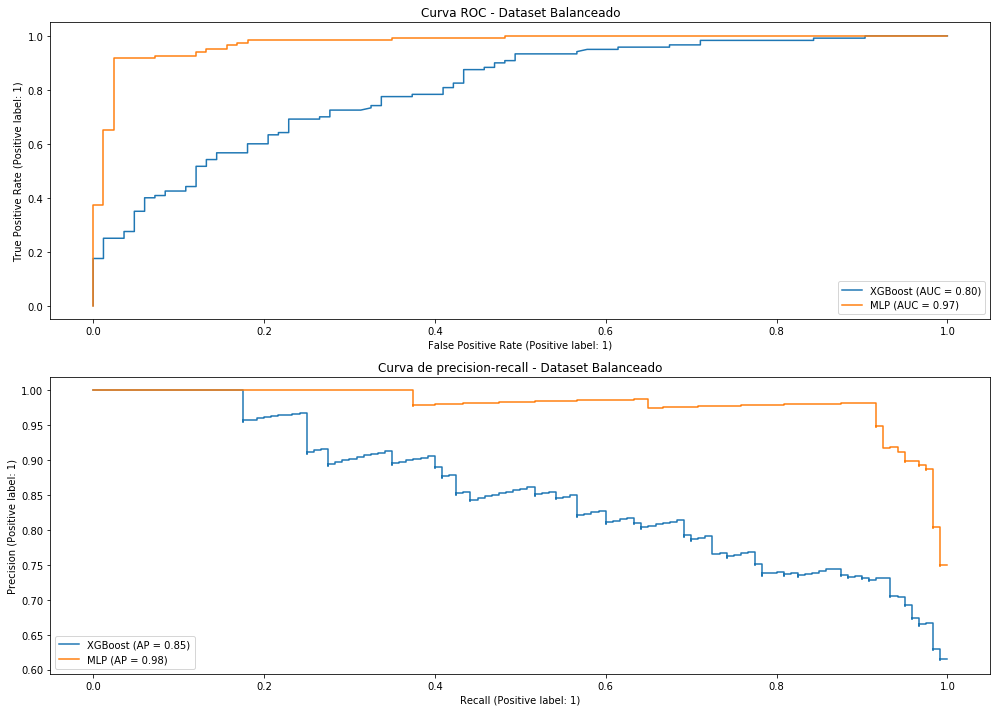

In [28]:

names = ['XGBoost', 'MLP']
classifiers = [clf, mlp_clf]
# Defino los graficos a mostrar
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
#Calculo la curva para los modelos entrenados con el dataset balanceado
get_plots(names, classifiers, ax, X_test, y_test, 'Dataset Balanceado')

fig.tight_layout()

plt.show() 

A priori, se observa que el modelo entrenado con el algoritmo de *XGBoost* esta por debajo del modelo *MLP* (alrededor de 10%). Como se dijo anteriormente, el modelo de *XGBoost* puede ser mejorado realizando un ajuste de sus parámetros.

Sin embargo, lo interesante en este caso es poder utilizar el modelo de *XGBoost* junto con la librería **SHAP** con el fin de poder comprender mejor las estructuras de las *reviews*

## Análisis de los *features* utilizados por el modelo

A continuación se realiza un análisis de los ***features*** utilizados por el modelo entrenado con *XGBoost*. Este análisis va en la misma línea que el realizado en la notebook **EDA dataset cliengo** y permite comprender cuáles son las ***features*** que distinguen las *reviews* **buenas** de las **malas**

In [29]:
import graphviz
import shap

#Path for using shap library
model_bytearray = xg_clf.save_raw()[4:]
def myfun(self=None):
    return model_bytearray

xg_clf.save_raw = myfun

In [30]:
explainer = shap.TreeExplainer(xg_clf)

In [31]:
pred = xg_clf.predict(dtest, output_margin=True)
explainer = shap.TreeExplainer(xg_clf)
shap_values = explainer.shap_values(dtest)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

6.519258e-09

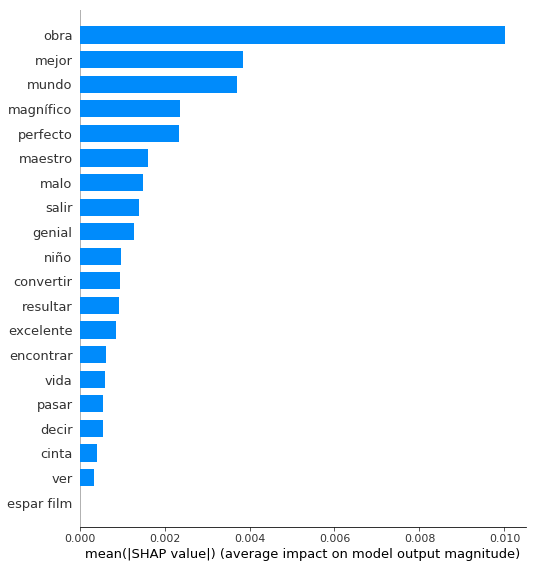

In [33]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

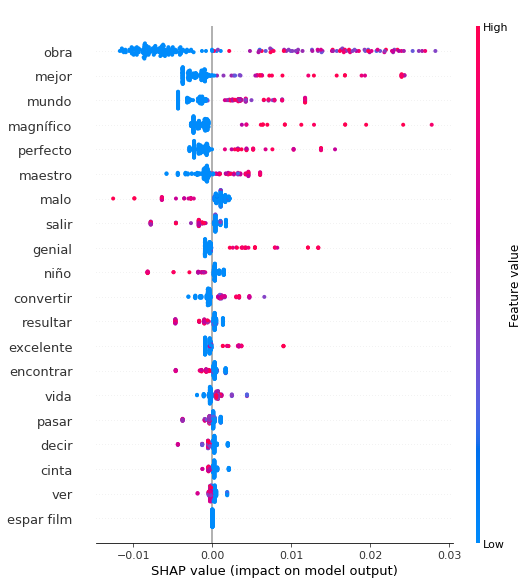

In [34]:
shap.summary_plot(shap_values, X_test)

En ambos gráficos se puede observar el peso que le otorga a determinadas palabras el modelo para clasificar una *review*.

Las palabras **obra, mejor, mundo, maginifico, perfecto, maestro, genial** son indicios de que se tratan *reviews* **buenas**. 

Mientras que las palabras **malo, salir, niño** son indicios de que se tratan *reviews* **malas**.

Si se mira el análisis exploratorio realizado en la notebook **EDA dataset cliengo**, se verá que algunas de estás palabras ya aparecían como indicadores para discriminar a las *reviews*.